In [7]:
import pandas as pd
import glob
import cv2
import numpy as np
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
from  tensorflow.keras import layers 
from tensorflow.keras.models import Sequential


RuntimeError: Physical devices cannot be modified after being initialized

In [2]:
positive_arr=[]
negative_arr=[]

In [3]:
positive_path = glob.glob("./archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/*.jpg")
for img in positive_path:
    # print(img.split('\\')[1])
    positive_arr.append(cv2.resize(cv2.imread(img), (100,100)))
len(positive_path)

134

In [4]:
Negative_path = glob.glob("./archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/*.jpg")
for img in Negative_path:
    # print(img.split('\\')[1])
    negative_arr.append(cv2.resize(cv2.imread(img), (100,100)))    
len(Negative_path)
len(positive_path)+len(Negative_path)

520

In [5]:
print(len(positive_arr),len(negative_arr))

134 386


In [16]:

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255) )
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((6, 6)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(400, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(800, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(1600, (3, 3), activation='relu'))
model.add(layers.Flatten())
# model.add(layers.Dense(604, activation='relu'))
model.add(layers.Dense(308, activation='relu'))
model.add(layers.Dense(1,activation='softmax'))


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(    from_logits=True ),
              metrics=['accuracy'])


In [18]:
  lables=[0 for i in range(len(negative_arr))]
  lables.extend( [1 for i in range(len(positive_arr))] ) 
  len(lables)

520

In [19]:
history = model.fit(np.array(negative_arr + positive_arr),np.array(lables), epochs=10 )

Epoch 1/10


InternalError:  Blas GEMM launch failed : a.shape=(32, 30000), b.shape=(30000, 308), m=32, n=308, k=30000
	 [[node sequential_3/dense_6/MatMul (defined at <ipython-input-19-c1a2c5420e73>:1) ]] [Op:__inference_train_function_2157]

Function call stack:
train_function


In [18]:
# plot feature map of first conv layer for given image
# import tensorflow as tf
# from tensorflow import keras
# from keras.applications.vgg19 import VGG19
# from keras.applications.vgg19 import preprocess_input
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import Model
# from matplotlib import pyplot
# from numpy import expand_dims

import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import inspect
from tqdm import tqdm
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# Set batch size for training and validation
batch_size = 32

# load the model
# model = VGG19()
# redefine model to output right after the first hidden layer

In [3]:
models = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
# models.summary()

NameError: name 'model' is not defined

In [ ]:
# load the image with the required shape
file = tf.keras.utils.get_file("Fundus-Photography-What-You-Need-to-Know-10.width-500.png",
"https://covalentcareers3.s3-accelerate.amazonaws.com/media/images/Fundus-Photography-What-You-Need-to-Know-10.width-500.png")
img = load_img(file, target_size=(32, 32))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = models.predict(img)
print(feature_maps.shape)
print(feature_maps [0,:,:,1].shape)
# plot all 64 maps in an 8x8 squares
square =5
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, : ,ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
ax.figure.savefig("feture_custom model")

In [ ]:
model  =  tf.keras.models.load_model('custom_cnn_model.h5')
model.summary()

In [2]:
model_dictionary = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}

In [6]:

file = tf.keras.utils.get_file("Fundus-Photography-What-You-Need-to-Know-10.width-500.png","https://covalentcareers3.s3-accelerate.amazonaws.com/media/images/Fundus-Photography-What-You-Need-to-Know-10.width-500.png")
model_benchmarks = {'model_name': [], 'num_model_params': [], 'validation_accuracy': []}
for model_name, model in tqdm(model_dictionary.items()):
    model=model()
    models = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
    print(model_name + "-------"+ str(model.input.shape[1]) )
    if model.input.shape[1]==None:
      input_shape=224
    else:
      input_shape=model.input.shape[1]
    img = load_img(file, target_size=(input_shape,input_shape,3)  )
    img = img_to_array(img)
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = models.predict(img)
    # print(feature_maps.shape)
    # print(feature_maps [0,:,:,1].shape)
    # plot all 64 maps in an 8x8 squares
    square =feature_maps.shape[1]
    ix = 1
    for _ in range(square):
      for _ in range(square):
        if feature_maps.shape[3] > ix:
          # specify subplot and turn of axis
          ax = pyplot.subplot(square, square, ix)
          ax.set_xticks([])
          ax.set_yticks([])
          # plot filter channel in grayscale
          pyplot.imshow(feature_maps[0, :, : ,ix-1], cmap='gray')
          ix += 1
    # show the figure
    pyplot.show()
    # ax.figure.savefig(model_name)
    ax=None

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

33193984/33188688 [==============================] - 6s 0us/step
DenseNet121-------224


  4%|██▉                                                                                | 1/28 [00:10<04:38, 10.31s/it]

58548224/58541896 [==============================] - 12s 0us/step
DenseNet169-------224


  7%|█████▉                                                                             | 2/28 [00:27<06:16, 14.47s/it]

82526208/82524592 [==============================] - 19s 0us/step
DenseNet201-------224


 11%|████████▉                                                                          | 3/28 [00:51<07:54, 18.96s/it]

21839872/21834768 [==============================] - 4s 0us/step
EfficientNetB0-------224


 14%|███████████▊                                                                       | 4/28 [00:58<05:33, 13.90s/it]

32153600/32148312 [==============================] - 5s 0us/step
EfficientNetB1-------240


 18%|██████████████▊                                                                    | 5/28 [01:06<04:36, 12.02s/it]

37437440/37432240 [==============================] - 7s 0us/step
EfficientNetB2-------260


 21%|█████████████████▊                                                                 | 6/28 [01:17<04:15, 11.61s/it]

50102272/50095040 [==============================] - 10s 0us/step
EfficientNetB3-------300


 25%|████████████████████▊                                                              | 7/28 [01:31<04:21, 12.44s/it]

78872576/78864416 [==============================] - 18s 0us/step
EfficientNetB4-------380


 29%|███████████████████████▋                                                           | 8/28 [01:54<05:13, 15.67s/it]

123469824/123465288 [==============================] - 31s 0us/step
EfficientNetB5-------456


 32%|██████████████████████████▋                                                        | 9/28 [02:31<07:04, 22.35s/it]

174465024/174460376 [==============================] - 46s 0us/step
EfficientNetB6-------528


 36%|█████████████████████████████▎                                                    | 10/28 [03:23<09:25, 31.40s/it]

268328960/268326632 [==============================] - 73s 0us/step
EfficientNetB7-------600


 39%|████████████████████████████████▏                                                 | 11/28 [04:44<13:12, 46.62s/it]

225214464/225209952 [==============================] - 60s 0us/step
InceptionResNetV2-------299


 43%|███████████████████████████████████▏                                              | 12/28 [05:52<14:10, 53.15s/it]

96116736/96112376 [==============================] - 22s 0us/step
InceptionV3-------299


 46%|██████████████████████████████████████                                            | 13/28 [06:19<11:17, 45.17s/it]

17227776/17225924 [==============================] - 3s 0us/step
MobileNet-------224


 50%|█████████████████████████████████████████                                         | 14/28 [06:24<07:46, 33.29s/it]

14540800/14536120 [==============================] - 2s 0us/step
MobileNetV2-------224


 54%|███████████████████████████████████████████▉                                      | 15/28 [06:30<05:23, 24.86s/it]

22667264/22661472 [==============================] - 3s 0us/step
MobileNetV3Large-------None


 57%|██████████████████████████████████████████████▊                                   | 16/28 [06:36<03:50, 19.24s/it]

10739712/10734624 [==============================] - 2s 0us/step
MobileNetV3Small-------None


 61%|█████████████████████████████████████████████████▊                                | 17/28 [06:41<02:45, 15.00s/it]

359751680/359748576 [==============================] - 94s 0us/step
NASNetLarge-------331


 64%|████████████████████████████████████████████████████▋                             | 18/28 [08:27<07:02, 42.30s/it]

24231936/24227760 [==============================] - 3s 0us/step
NASNetMobile-------224


 68%|███████████████████████████████████████████████████████▋                          | 19/28 [08:37<04:53, 32.62s/it]

179650560/179648224 [==============================] - 45s 0us/step
ResNet101-------224


 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [09:27<05:02, 37.75s/it]

179519488/179518384 [==============================] - 51s 0us/step
ResNet101V2-------224


 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [10:21<04:59, 42.79s/it]

242900992/242900224 [==============================] - 68s 0us/step
ResNet152-------224


 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [11:47<05:33, 55.62s/it]

242753536/242745792 [==============================] - 71s 0us/step
ResNet152V2-------224


 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [13:13<05:24, 64.86s/it]

102973440/102967424 [==============================] - 27s 0us/step
ResNet50-------224


 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [13:48<03:43, 55.78s/it]

102875136/102869336 [==============================] - 29s 0us/step
ResNet50V2-------224


 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [14:25<02:30, 50.07s/it]

VGG16-------224


 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [14:31<01:13, 36.95s/it]

VGG19-------224


 96%|███████████████████████████████████████████████████████████████████████████████   | 27/28 [14:36<00:27, 27.47s/it]

91889664/91884032 [==============================] - 22s 0us/step
Xception-------299


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [15:04<00:00, 32.30s/it]


In [3]:
file = tf.keras.utils.get_file("Fundus-Photography-What-You-Need-to-Know-10.width-500.png","https://covalentcareers3.s3-accelerate.amazonaws.com/media/images/Fundus-Photography-What-You-Need-to-Know-10.width-500.png")

In [16]:
    
    model=VGG19()
    models = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#     print(model_name + "-------"+ str(model.input.shape[1]) )
    if model.input.shape[1]==None:
        input_shape=224
    else:
        input_shape=model.input.shape[1]
    img = load_img(file, target_size=(input_shape,input_shape,3)  )
    img = img_to_array(img)
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = models.predict(img)
    # print(feature_maps.shape)
    # print(feature_maps [0,:,:,1].shape)
    # plot all 64 maps in an 8x8 squares
    square =feature_maps.shape[1]
    ix = 1
    for _ in range(square):
        for _ in range(square):
            if feature_maps.shape[3] > ix:
                # specify subplot and turn of axis
                ax = pyplot.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                pyplot.imshow(feature_maps[0, :, : ,ix-1], cmap='gray')
                ix += 1
    # show the figure
    pyplot.show()
    # ax.figure.savefig(model_name)
    ax=None

In [11]:
[i for i in model_dictionary]

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception']

DenseNet121
(1, 112, 112, 64)
DenseNet169
(1, 112, 112, 64)
DenseNet201
(1, 112, 112, 64)
EfficientNetB0
(1, 225, 225, 3)
EfficientNetB1
(1, 241, 241, 3)
EfficientNetB2
(1, 261, 261, 3)
EfficientNetB3
(1, 301, 301, 3)
EfficientNetB4
(1, 381, 381, 3)
EfficientNetB5
(1, 457, 457, 3)
EfficientNetB6
(1, 529, 529, 3)


EfficientNetB7
(1, 601, 601, 3)
InceptionResNetV2
(1, 149, 149, 32)
InceptionV3
(1, 149, 149, 32)
MobileNet
(1, 112, 112, 32)
MobileNetV2
(1, 112, 112, 32)
MobileNetV3Large
(1, 112, 112, 16)
MobileNetV3Small
(1, 112, 112, 16)
NASNetLarge
(1, 165, 165, 96)
NASNetMobile
(1, 111, 111, 32)
ResNet101
(1, 112, 112, 64)
ResNet101V2
(1, 114, 114, 64)


ResNet152
(1, 112, 112, 64)
ResNet152V2
(1, 114, 114, 64)
ResNet50
(1, 112, 112, 64)
ResNet50V2
(1, 114, 114, 64)
VGG16
(1, 112, 112, 64)
VGG19
(1, 112, 112, 64)
Xception
(1, 149, 149, 32)


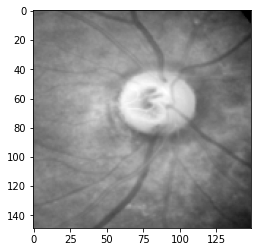

In [27]:
    # model=keras.applications.MobileNetV3Large()
    # load the image with the required shape
file = tf.keras.utils.get_file("Fundus-Photography-What-You-Need-to-Know-10.width-500.png","https://covalentcareers3.s3-accelerate.amazonaws.com/media/images/Fundus-Photography-What-You-Need-to-Know-10.width-500.png")
os.mkdir(os.path.join(os.getcwd(),'models_feature_extraction'))
for model_name in model_dictionary:
        model=model_dictionary[model_name]()
        models = keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
        if model.input.shape[1]==None:
              input_shape=224
        else:
              input_shape=model.input.shape[1]
        img = load_img(file, target_size=(input_shape, input_shape))
        # convert the image to an array
        img = img_to_array(img)
        # expand dimensions so that it represents a single 'sample'
        img = expand_dims(img, axis=0)
        # prepare the image (e.g. scale pixel values for the vgg)
        img = preprocess_input(img)
        # get feature map for first hidden layer
        feature_maps = models.predict(img)
        print(model_name)
        print(feature_maps.shape)
#         print(feature_maps [0,:,:,1].shape)
        # plot all 64 maps in an 8x8 squares
        square =feature_maps.shape[3]
        ix = 1
        os.mkdir(os.path.join( os.path.join(os.getcwd(),'models_feature_extraction'),model_name))
        flag=0
        for _ in range(square):
            if flag==1:
                break
            for _ in range(square):
                if feature_maps.shape[3] >= ix:
                    ax=None                    
                    # specify subplot and turn of axis
                    ax = pyplot.plot(square, square, ix)
#                     ax.set_xticks([])
#                     ax.set_yticks([])
                    # plot filter channel in grayscale
                    pyplot.imshow(feature_maps[0, :, : ,ix-1], cmap='gray')
                    pyplot.savefig( './models_feature_extraction/'+model_name+'/'+str(ix)+'.png')
#                     pyplot.show()
                    ix += 1
                else:
                    flag=1
                    break
                    
                    
        # show the figure
#         pyplot.show()
#         ax.figure.savefig('aa')


In [26]:
feature_maps.shape

(1, 112, 112, 64)